# DS 3000 Lesson 4

### Admin:
- Modules needed today (`seaborn, matplotlib, pandas`); if they are not installed, run (in terminal):
    - `pip install seaborn matplotlib pandas`
- Homework 2 due Thursday, Homework 3 to be posted
- Quiz 1 will be posted on Friday (you may choose any 2 hour chunk to complete it over the weekend)
     

### Content:
* Review: Loading Data and Data processing with `pandas`
* Plotting with `matplotlib` and `seaborn`:
    * histograms
    * scatter plots
    * line plots

# Loading Data into Pandas

Data comes from many places:
- Web Scraping
- Application Program Interface (API)
- SQL
- local file:
    - csv
    - JSON
    - fixed width tables (HTML)
    
### Pandas functions which load data
| Mode | Description
| ------ | :------
| **`read_csv`** | Load comma seperated values data from a file or URL (other delimeters too!)
| **`read_xlsx`** | Read data in xls format (Mircosoft Excel)
| **`read-fwf`** | Read data in fixed-width column format (i.e., no delimiters such as tab-separated txt files)
| **`read_clipboard`** | Version of read_csv that reads data from the clipboard; useful for converting tables from web pages
| **`read_html`** | Read all tables contained in the given HTML document.
| **`read_json`** | Read data from a JSON (JavaScript Object Notation) string representation


## Reading CSV (comma seperated value) into Pandas

A CSV is a spreadsheet.  It is a text file where:
- all the values of a row are seperated by commas
    - what a great name for the file type, right?
- all the rows are seperated by newline characters
    - newline `\n` is a special character which marks the end of a line
    - pressing `<enter>` inputs a newline in text editors


`pandas` functions:
- read_csv
    - header
    - index_col
    - dtype

In [2]:
import pandas as pd

pd.read_csv('cleaner_gtky.csv')


,fake_student_id,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
0,1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234.0,60.0
1,3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233.0,100.0
2,2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252.0,70.0
3,4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243.0,60.0
4,9977,09-09-22 16:06,Sophomore,No,5,Python,NaN,R,NaN,231.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...
92,3775,09-09-22 15:50,Junior,Yes,8,Python,NaN,R,NaN,262.0,100.0
93,1562,09-09-22 16:06,Sophomore,No,7,Java,NaN,NaN,NaN,230.0,73.0
94,9610,09-09-22 14:13,Senior,Yes,10,Python,Java,NaN,NaN,264.0,100.0
95,2120,09-09-22 13:46,Junior,Yes,2,Java,NaN,NaN,NaN,246.0,100.0


In [3]:
gtky = pd.read_csv('cleaner_gtky.csv', index_col =[0])
gtky.head()

,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
fake_student_id,,,,,,,,,,
1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234.0,60.0
3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233.0,100.0
2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252.0,70.0
4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243.0,60.0
9977,09-09-22 16:06,Sophomore,No,5,Python,NaN,R,NaN,231.0,90.0


In [4]:
gtky = pd.read_csv('cleaner_gtky.csv', index_col = None)
gtky.head()

,fake_student_id,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
0,1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234.0,60.0
1,3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233.0,100.0
2,2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252.0,70.0
3,4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243.0,60.0
4,9977,09-09-22 16:06,Sophomore,No,5,Python,NaN,R,NaN,231.0,90.0


In [5]:
gtky = pd.read_csv('cleaner_gtky.csv', header = None)
gtky.head()

,0,1,2,3,4,5,6,7,8,9,10
0,fake_student_id,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
1,1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234,60
2,3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233,100
3,2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252,70
4,4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243,60


## Saving a DataFrame as a csv
- `.to_csv()`
    - index=False
    - header=False
    - appending to csv (mode='a', header=None)

In [6]:
gtky = pd.read_csv('cleaner_gtky.csv')
gtky.head()

,fake_student_id,time_stamp,class,co_op,prog_exp,python_exp,java_exp,r_exp,c_exp,age_months,ideal_start_salary_thousands
0,1380,09-09-22 15:37,Sophomore,No,9,Python,NaN,NaN,NaN,234.0,60.0
1,3926,09-09-22 16:01,Sophomore,No,7,Python,NaN,NaN,NaN,233.0,100.0
2,2394,09-09-22 14:19,Junior,Yes,7,Python,Java,NaN,NaN,252.0,70.0
3,4827,09-09-22 16:07,Junior,No,7,Python,Java,NaN,NaN,243.0,60.0
4,9977,09-09-22 16:06,Sophomore,No,5,Python,NaN,R,NaN,231.0,90.0


In [7]:
gtky.to_csv('gtky_copy.csv', index = False)

In [8]:
gtky.to_csv('gtky_copy_no_head.csv', index = False)

# How do I explore a new-to-me dataset?

## First: View raw data:

- `.columns()`
- `.head()`
- `.shape()`
- `.unique()`
- `Counter()`

## Second: Make some plots ... (next)

In [11]:
df_korea = pd.read_csv('Korean_demographics_2000-2022.csv')
df_korea.head()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,1/1/2000,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,1/1/2000,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,1/1/2000,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,1/1/2000,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,1/1/2000,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


In [12]:
df_korea['Region'].unique()

array(['Busan', 'Chungcheongbuk-do', 'Chungcheongnam-do', 'Daegu',
       'Daejeon', 'Gangwon-do', 'Gwangju', 'Gyeonggi-do',
       'Gyeongsangbuk-do', 'Gyeongsangnam-do', 'Incheon', 'Jeju',
       'Jeollabuk-do', 'Jeollanam-do', 'Sejong', 'Seoul', 'Ulsan',
       'Whole country'], dtype=object)

In [13]:
from collections import Counter

Counter(df_korea['Region'])

Counter({'Busan': 270,
         'Chungcheongbuk-do': 270,
         'Chungcheongnam-do': 270,
         'Daegu': 270,
         'Daejeon': 270,
         'Gangwon-do': 270,
         'Gwangju': 270,
         'Gyeonggi-do': 270,
         'Gyeongsangbuk-do': 270,
         'Gyeongsangnam-do': 270,
         'Incheon': 270,
         'Jeju': 270,
         'Jeollabuk-do': 270,
         'Jeollanam-do': 270,
         'Sejong': 270,
         'Seoul': 270,
         'Ulsan': 270,
         'Whole country': 270})

## Groupby

Groupby collects all the rows which have some consistent feature in the data and reports aggregate statistics (often the `.mean()` is helpful).

... its best to just dive into an example:

In [16]:
df_korea.iloc[:,1:3].groupby('Region').mean()

,Birth
Region,
Busan,2148.022222
Chungcheongbuk-do,1113.507407
Chungcheongnam-do,1496.451852
Daegu,1651.677778
Daejeon,1119.266667
Gangwon-do,990.740741
Gwangju,1086.440741
Gyeonggi-do,9175.785185
Gyeongsangbuk-do,1835.751852


In [17]:
df_korea.iloc[:,1:3].groupby('Region').max()

,Birth
Region,
Busan,3935.0
Chungcheongbuk-do,1903.0
Chungcheongnam-do,2398.0
Daegu,3057.0
Daejeon,1859.0
Gangwon-do,1966.0
Gwangju,2159.0
Gyeonggi-do,13527.0
Gyeongsangbuk-do,3362.0


`df.groupby()` to remember:
- `df.groupby(feature)` collects all the rows whose feature is matching
    - example 0 above: we take the mean of all rows with matching `Region`
    - example 1 above: we take the max of all rows with matching `Region`
- `df.groupby(feature)` is not a dataframe, but a pandas `groupby` object
- it is often helpful to take some relevant method (`.min() .max() .mean()`...) of the groupby object

(++) you can `groupby()` more than 1 feature

## Plotting

A plot (visualization) is one of data's ways of speaking to us:
 - we plot to help ourselves understand data
     - get in the habit of quickly plotting some "quick and ugly" graphs to get a sense of your data
 - we plot to help others understand data
     - we build beautiful graphs because a picture can be worth a thousand words ...
         - check out [https://www.reddit.com/r/dataisbeautiful](https://www.reddit.com/r/dataisbeautiful)
         - check out [https://informationisbeautiful.net/](https://informationisbeautiful.net/)

## Plotting Tips:
- always save source code which generated your graph (you'll often need to change something later)
- don't make a pie chart
- dense charts, packed with lots of information, are great to explore
    - [dense chart example](https://www.reddit.com/r/dataisbeautiful/comments/xkvnk1/oc_saw_a_post_of_gender_balance_and_average/)
- sparse charts, with little information in them, are great to communicate
    - [sparse chart example](https://www.reddit.com/r/dataisbeautiful/comments/xiy4fc/oc_nights_when_the_temperature_never_dropped/)

plotting is an iterative process:

```python
question = 'I wonder how ...'
while understanding < understanding_needed:
    # you make a plot which answers your first 
    # question ... but raises another question!
    new_question = make_plot(question)
    
    # now you're satisfied with old question
    # but you're interested in the new one
    question = new_question

```

# Histograms
We use histograms to investigate how often certain values appear in the data. 
- The x-axis is (almost) always the values which occur
- the y-axis is how often they occur

- [a delicious example](https://i.redd.it/x42zrm4hi4x51.jpg)
    - they have two columns for s ... easier to read but not proper for Data Science


Todo list:

- `plt.hist()` on `Marriage_rate`
- resizing figure
- `density` keyword
- labelling axes
- `bin` argument
- seaborn makes it look nice
- exporting to pdf:

```python
from matplotlib.backends.backend_pdf import PdfPages

# code which plots goes here

f = 'korea_marriage_hist.pdf'
with PdfPages(f) as pdf:
    pdf.savefig(bbox_inches='tight')
    
```

In [19]:
df_korea.loc[:,'Marriage_rate'].min()

np.float64(2.4)

In [20]:
df_korea.loc[:,'Marriage_rate'].max()

np.float64(12.4)

In [22]:
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.backends.backend_pdf import PdfPages
import seaborn as sns

Text(0, 0.5, 'count')

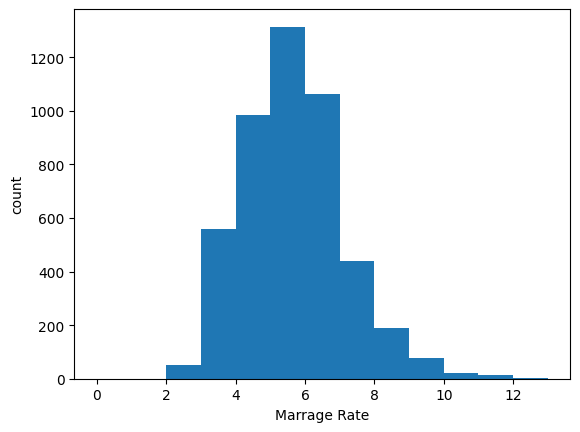

In [25]:
bins = np.linspace(0, 13, 14)

plt.hist(df_korea['Marriage_rate'], bins = bins)
plt.xlabel('Marrage Rate')
plt.ylabel('count')



Text(0, 0.5, 'density')

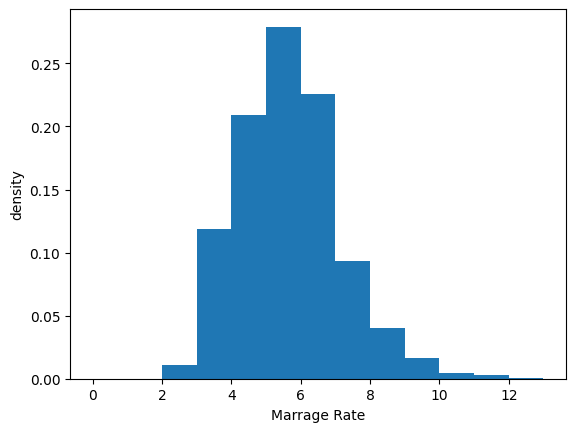

In [26]:
plt.hist(df_korea['Marriage_rate'], bins = bins, density = True)
plt.xlabel('Marrage Rate')
plt.ylabel('density')

# Subplots
Subplots are useful for showing multiple views of the data side by side.

goal: show relationship between `Marriage_rate` as `Region` varies.

- `plt.subplot(n_rows, n_cols, desired_subplot)`
- figure vs axis (`plt.gcf()` and `plt.gca()`)
- labelling subplot title
- making a bigger figure
    - `plt.figure(figsize=(10, 5))`
        - make a new figure and specify its size
    - `plt.gcf().set_size_inches(15, 7)`
        - get the current figure `gcf()` and set its size
- `plt.ylim()`

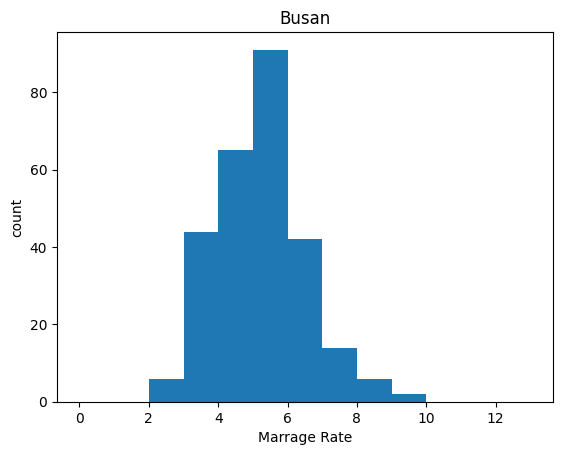

In [31]:
bool_busan = df_korea['Region'] == 'Busan'
df_busan = df_korea.loc[bool_busan, :]

plt.hist(df_busan['Marriage_rate'], bins = bins)
plt.xlabel('Marrage Rate')
plt.ylabel('count')
plt.gca().title.set_text('Busan')

In [33]:
# now all of the regions
# a useful function to convert an array to a list is .tolist()
region_list = df_korea['Region'].unique().toList()

for region in region_list:
    region_index = region_list.index(region)
    plt.subplot(3,6, region_index+1)
    
    bool_region = df_korea['Region'] == 'region'
    df_region = df_korea.loc[bool_region, :]

    plt.hist(df_busan['Marriage_rate'], bins = bins)
    plt.xlabel('Marrage Rate')
    if region_index in (0,6,12):
        plt.ylabel('Count')
    plt.gca().title.set_text(region_list[region_index])
    
    
plt.gcf().set_size_inches(18, 6)
plt.subplot_adjust(wspace = 0.5, hspace = 1)
    


AttributeError: 'numpy.ndarray' object has no attribute 'toList'

In [1]:
# another example with our gtky data
# how does programming experience vary based on class?

region_list = df_korea['Region'].unique().toList()

for region in region_list:
    region_index = region_list.index(region)
    plt.subplot(3,6, region_index+1)
    
    bool_region = df_korea['Region'] == 'region'
    df_region = df_korea.loc[bool_region, :]

    plt.hist(df_busan['Marriage_rate'], bins = bins)
    plt.xlabel('Marrage Rate')
    if region_index in (0,6,12):
        plt.ylabel('Count')
    plt.gca().title.set_text(region_list[region_index])
    
    
plt.gcf().set_size_inches(18, 6)
plt.subplot_adjust(wspace = 0.5, hspace = 1)

## Scatter plots

What is the relationship between `Marriage_rate` and `National_growth_rate` in:
1. `Seoul`
1. `Busan`

skills:
- `plt.scatter`
- `alpha`
- multiple scatters on same plot
- legend
- log scale

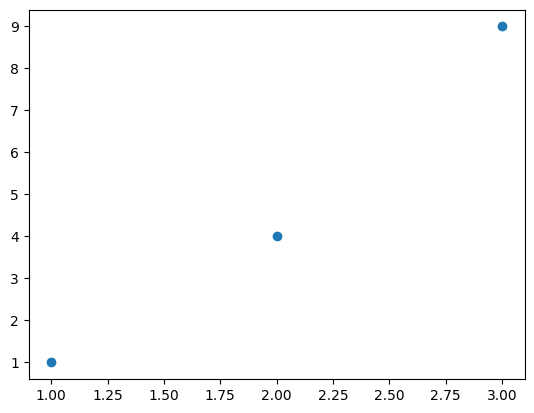

In [34]:
x = [1,2,3]
y = [1,4,9]
plt.scatter(x,y)

In [35]:
bool_seoul = df_korea['Region'] == 'Seoul'
df_seoul = df_korea.loc[bool_seoul, :]

plt.scatter(df_seoul['Marrage_rate'],
            df_seoul['Natural_growth_rate'], alpha = 0.5)

plt.xlabel('marriage rate')
plt.ylabel('natural grown rate')


KeyError: 'Marrage_rate'

: 

In [3]:
# what about seeing if there is a relationship between programming 
# experience and age in months for Sophomores and everyone else?



# Line Plots

What was the change in mean `marriage_rate` over time in the dataset?

- `plt.plot()` (line plot)
- cleaning data to answer the question
- `groupby`
- line style (width, color, dot/dash)

In [27]:
# can look at the unique dates in the data set
# df_korea['Date'].unique()

,Date,Region,Birth,Birth_rate,Death,Death_rate,Divorce,Divorce_rate,Marriage,Marriage_rate,Natural_growth,Natural_growth_rate
0,2000-01-01,Busan,3752.0,11.61,1875.0,5.8,814.0,2.5,2435.0,7.5,1877.0,5.8
1,2000-01-01,Chungcheongbuk-do,1903.0,15.06,924.0,7.3,220.0,1.7,828.0,6.6,979.0,7.7
2,2000-01-01,Chungcheongnam-do,2398.0,14.75,1466.0,9.0,321.0,2.0,1055.0,6.5,932.0,5.7
3,2000-01-01,Daegu,3057.0,14.39,1117.0,5.3,422.0,2.0,1577.0,7.4,1940.0,9.1
4,2000-01-01,Daejeon,1859.0,16.08,565.0,4.9,280.0,2.4,868.0,7.5,1294.0,11.2


# Rest of Class Exercise (if time)

Download the `pokedata.csv` file from the Homeworks Module in Canvas and make sure it is stored in the same directory as this `day4.ipynb` lecture file. In the time we have left make **at least one** (more if you have more time) plot that demonstrates the answer to some question(s) you might be interested in concerning the original 151 Pokémon. If you are struggling to come up with a question, below are some *suggestions*. When you are done, share your findings with your neighbor(s), making sure to explain what the plot you made means/how it helps answer your question.

Some possible questions to address with your plot(s):
- How does Pokémon height differ across types?
- Do Pokémon with higher Pokédex values generally have better (higher) damage?
- What is the relationship between a Pokémon's weight and their speed?